In [1]:
import sys
!{sys.executable} -m pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/5d/6a/9669836f813b73fe5abf5e9f118ccc9b7fb060f02789d385825b0943f9c8/tensorflow-2.3.1-cp37-cp37m-win_amd64.whl
  Stored in directory: C:\Users\nourd\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built termcolor
  Found existing installation: h5py 2.9.0
    Uninstalling h5py-2.9.0:
      Successfully uninstalled h5py-2.9.0


In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.3.1'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

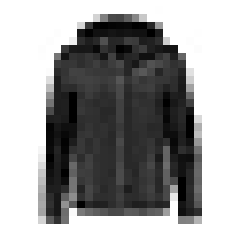

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:

X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

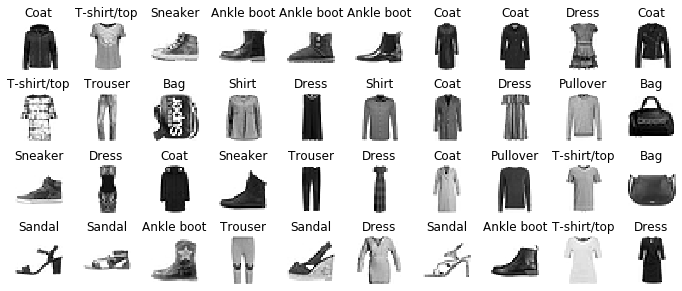

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.layers

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
model.get_layer(hidden1.name) is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[ 0.04332416, -0.04339967, -0.02723873, ...,  0.05682009,
        -0.06718381,  0.05319363],
       [ 0.03355709, -0.04114063,  0.01103917, ..., -0.0351342 ,
        -0.050581  ,  0.06351662],
       [-0.02190433, -0.06613284,  0.04272599, ..., -0.0646375 ,
         0.00811227, -0.02042604],
       ...,
       [-0.05219786, -0.00384367, -0.01993715, ..., -0.03397673,
         0.00033053, -0.06002437],
       [-0.07377294, -0.04281396,  0.04214229, ...,  0.05743833,
        -0.03103413, -0.05923659],
       [-0.0501185 , -0.03840724,  0.05905633, ...,  0.0390837 ,
        -0.05120409,  0.04977146]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:

biases.shape

(300,)

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [26]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 23s 13ms/step - loss: 0.7199 - accuracy: 0.7645 - val_loss: 0.5172 - val_accuracy: 0.8250
Epoch 2/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4867 - accuracy: 0.8314 - val_loss: 0.4320 - val_accuracy: 0.8554
Epoch 3/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4420 - accuracy: 0.8458 - val_loss: 0.4212 - val_accuracy: 0.8620
Epoch 4/30
1719/1719 [==============================] - 26s 15ms/step - loss: 0.4158 - accuracy: 0.8552 - val_loss: 0.3983 - val_accuracy: 0.8572
Epoch 5/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3967 - accuracy: 0.8625 - val_loss: 0.3853 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 20s 12ms/step - loss: 0.3808 - accuracy: 0.8653 - val_loss: 0.3797 - val_accuracy: 0.8658
Epoch 7/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3676 - accuracy: 0.8708 - val_loss: 0.3674 -

In [27]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [28]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

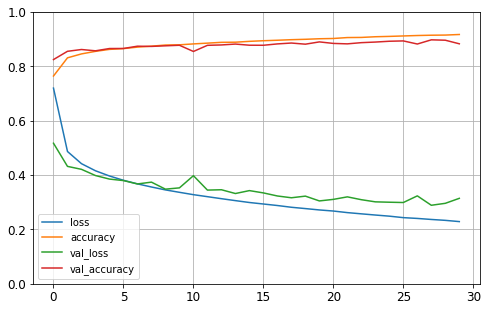

In [30]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3561 - accuracy: 0.8725


[0.3561033606529236, 0.8725000023841858]

In [32]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [34]:

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

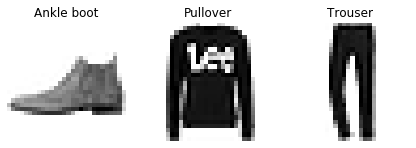

In [36]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Plot Learning curves when using different optimizers

Momentum optimizer

In [38]:
# we use in this case momentum = 0.9 ( in te previous example we have momentum = 0)
# lr= learning rate 
# deacy : Learning rate decay over each update
# nesterov: boolean. Whether to apply Nesterov momentum 


sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])

In [39]:
history = model.fit(X_train, y_train, batch_size=3, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
18334/18334 [==============================] - 67s 4ms/step - loss: 0.7074 - accuracy: 0.7423 - val_loss: 0.6088 - val_accuracy: 0.7606
Epoch 2/30
18334/18334 [==============================] - 70s 4ms/step - loss: 0.5993 - accuracy: 0.7929 - val_loss: 0.5674 - val_accuracy: 0.7856
Epoch 3/30
18334/18334 [==============================] - 79s 4ms/step - loss: 0.5755 - accuracy: 0.8034 - val_loss: 0.5829 - val_accuracy: 0.7970
Epoch 4/30
18334/18334 [==============================] - 69s 4ms/step - loss: 0.5573 - accuracy: 0.8125 - val_loss: 0.6554 - val_accuracy: 0.7918
Epoch 5/30
18334/18334 [==============================] - 73s 4ms/step - loss: 0.5330 - accuracy: 0.8193 - val_loss: 0.5213 - val_accuracy: 0.8356
Epoch 6/30
18334/18334 [==============================] - 62s 3ms/step - loss: 0.5130 - accuracy: 0.8240 - val_loss: 0.4847 - val_accuracy: 0.8274
Epoch 7/30
18334/18334 [==============================] - 62s 3ms/step - loss: 0.5025 - accuracy: 0.8294 - val_loss: 0

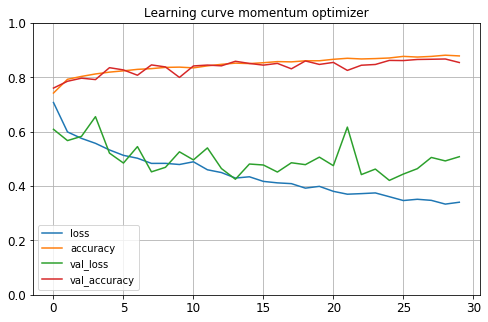

In [40]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.title("Learning curve momentum optimizer", fontsize=12)
plt.show()

Adam optimizer

In [41]:
Adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam,metrics=["accuracy"])

In [ ]:
history3 = model.fit(X_train, y_train, batch_size=3, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
18334/18334 [==============================] - 93s 5ms/step - loss: 0.3026 - accuracy: 0.8916 - val_loss: 0.4333 - val_accuracy: 0.8750
Epoch 2/30
18334/18334 [==============================] - 78s 4ms/step - loss: 0.2927 - accuracy: 0.8959 - val_loss: 0.4565 - val_accuracy: 0.8742
Epoch 3/30
18334/18334 [==============================] - 73s 4ms/step - loss: 0.2857 - accuracy: 0.8978 - val_loss: 0.4156 - val_accuracy: 0.8792
Epoch 4/30
18334/18334 [==============================] - 76s 4ms/step - loss: 0.2834 - accuracy: 0.8981 - val_loss: 0.4208 - val_accuracy: 0.8798
Epoch 5/30
18334/18334 [==============================] - 70s 4ms/step - loss: 0.2808 - accuracy: 0.8997 - val_loss: 0.4377 - val_accuracy: 0.8780
Epoch 6/30
 8857/18334 [=============>................] - ETA: 36s - loss: 0.2805 - accuracy: 0.9002

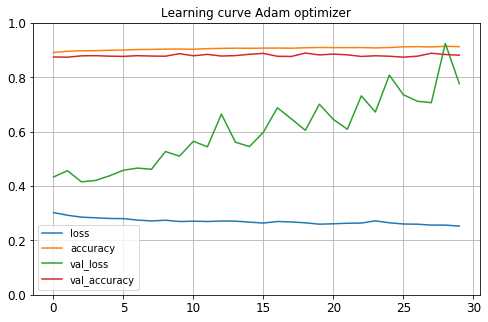

In [43]:
import pandas as pd

pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.title("Learning curve Adam optimizer", fontsize=12)
plt.show()

# Plot learning curves with Different batch size and different number of epochs

In [44]:
history4 = model.fit(X_train, y_train, batch_size=1, epochs=7,
                    validation_data=(X_valid, y_valid))

Epoch 1/7
55000/55000 [==============================] - 243s 4ms/step - loss: 0.3449 - accuracy: 0.8953 - val_loss: 0.7577 - val_accuracy: 0.8668
Epoch 2/7
55000/55000 [==============================] - 239s 4ms/step - loss: 0.3650 - accuracy: 0.8908 - val_loss: 1.0262 - val_accuracy: 0.8580
Epoch 3/7
55000/55000 [==============================] - 254s 5ms/step - loss: 0.3730 - accuracy: 0.8927 - val_loss: 1.0442 - val_accuracy: 0.8718
Epoch 4/7
55000/55000 [==============================] - 236s 4ms/step - loss: 0.3818 - accuracy: 0.8891 - val_loss: 0.8958 - val_accuracy: 0.8752
Epoch 5/7
55000/55000 [==============================] - 235s 4ms/step - loss: 0.3839 - accuracy: 0.8895 - val_loss: 1.1174 - val_accuracy: 0.8688
Epoch 6/7
55000/55000 [==============================] - 251s 5ms/step - loss: 0.3956 - accuracy: 0.8890 - val_loss: 0.9892 - val_accuracy: 0.8634
Epoch 7/7
55000/55000 [==============================] - 220s 4ms/step - loss: 0.3995 - accuracy: 0.8869 - val_loss: 1

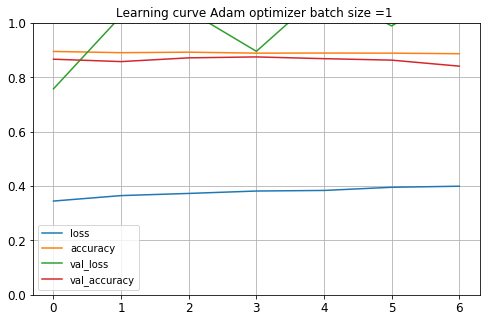

In [46]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.title("Learning curve Adam optimizer batch size =1 ", fontsize=12)
plt.show()

In [47]:
history4 = model.fit(X_train, y_train, batch_size=100, epochs=12,
                    validation_data=(X_valid, y_valid))

Epoch 1/12
550/550 [==============================] - 14s 25ms/step - loss: 0.3153 - accuracy: 0.9015 - val_loss: 0.9573 - val_accuracy: 0.8884
Epoch 2/12
550/550 [==============================] - 12s 21ms/step - loss: 0.2546 - accuracy: 0.9154 - val_loss: 0.9460 - val_accuracy: 0.8882
Epoch 3/12
550/550 [==============================] - 12s 21ms/step - loss: 0.2394 - accuracy: 0.9185 - val_loss: 0.9740 - val_accuracy: 0.8876
Epoch 4/12
550/550 [==============================] - 13s 23ms/step - loss: 0.2306 - accuracy: 0.9200 - val_loss: 0.9980 - val_accuracy: 0.8868
Epoch 5/12
550/550 [==============================] - 14s 26ms/step - loss: 0.2237 - accuracy: 0.9206 - val_loss: 0.9798 - val_accuracy: 0.8914
Epoch 6/12
550/550 [==============================] - 15s 27ms/step - loss: 0.2206 - accuracy: 0.9217 - val_loss: 1.0023 - val_accuracy: 0.8910
Epoch 7/12
550/550 [==============================] - 16s 29ms/step - loss: 0.2158 - accuracy: 0.9232 - val_loss: 1.0315 - val_accuracy:

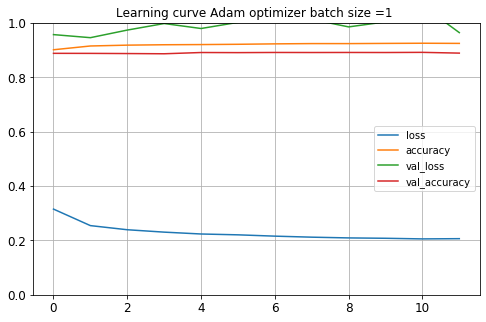

In [48]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.title("Learning curve Adam optimizer batch size =1 ", fontsize=12)
plt.show()

In [49]:
history4 = model.fit(X_train, y_train, batch_size=500, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
110/110 [==============================] - 13s 119ms/step - loss: 0.1986 - accuracy: 0.9277 - val_loss: 1.0026 - val_accuracy: 0.8922
Epoch 2/30
110/110 [==============================] - 11s 105ms/step - loss: 0.1933 - accuracy: 0.9289 - val_loss: 1.0250 - val_accuracy: 0.8936
Epoch 3/30
110/110 [==============================] - 13s 116ms/step - loss: 0.1923 - accuracy: 0.9290 - val_loss: 1.0245 - val_accuracy: 0.8934
Epoch 4/30
110/110 [==============================] - 13s 121ms/step - loss: 0.1912 - accuracy: 0.9296 - val_loss: 1.0467 - val_accuracy: 0.8936
Epoch 5/30
110/110 [==============================] - 15s 134ms/step - loss: 0.1906 - accuracy: 0.9298 - val_loss: 1.0631 - val_accuracy: 0.8942
Epoch 6/30
110/110 [==============================] - 14s 125ms/step - loss: 0.1898 - accuracy: 0.9301 - val_loss: 1.0736 - val_accuracy: 0.8934
Epoch 7/30
110/110 [==============================] - 13s 122ms/step - loss: 0.1894 - accuracy: 0.9295 - val_loss: 1.0734 - val_ac

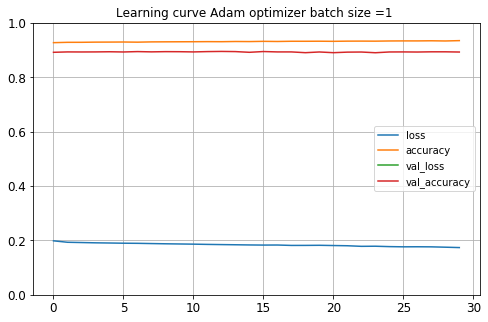

In [50]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.title("Learning curve Adam optimizer batch size =1 ", fontsize=12)
plt.show()

# how we can find the best configuration and combine techniques to have the best model